In [ ]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

In [97]:
# modifying code given in class
def smith_waterman(seq1, seq2, match, gap_penalty, mismatch_penalty):
    # initialize grid
    data = np.zeros((len(seq1), len(seq2)))
    # store max length and coordinates
    max_len = 0
    max_i = 0
    max_j = 0
    # enumerate over sequences
    for i, base1 in enumerate(seq1): 
        for j, base2 in enumerate(seq2):
            # if the two chars are identical
            if base1 == base2:
                # if square is already filled in due to gaps in previous enumerations
                # keep the larger number
                # this also takes care of the horizontal gap scenario
                # because every char in seq1 are compared with all chars in seq2 sequentially
                # and max match length is taken
                # data[i, j] = current square value
                # data[i-1, j-1] + match = value diagonally before
                # data[i-1, j-2] + match - gap_penalty= value with horizontal gap (down 1, right 2)
                if i > 0 and j > 0:
                    data[i,j] = max(data[i,j], data[i-1,j-1] + match)
                if i > 0 and j > 1:
                    data[i,j] = max(data[i,j], data[i-1,j-1] + match, data[i-1, j-2]+match-gap_penalty)
            # if there is a gap vertically
            elif i < len(seq1)-1:
                if seq1[i+1] == base2:
                    if i > 0 and j > 0:
                        # take maximum between its current value and (match-gap_penalty + (value at up 2, left 1))
                        data[i+1,j] = max(data[i+1,j], data[i-1,j-1]+match-gap_penalty)
                    else:
                        data[i+1,j] += match-gap_penalty 
            # if mismatch 
            else: data[i,j] = max(0, data[i,j] - mismatch_penalty) 
            
            # update longest sequence
            if data[i,j] > max_len:
                max_len = data[i,j]
                max_i = i
                max_j = j 
    
    # printing longest matching sequence 
    ret_1 = ""
    ret_2 = "" 
    while max(data[max_i, max_j], data[max_i-1, max_j], data[max_i, max_j-1]) > 0: 
      # match
      if seq1[max_i] == seq2[max_j]: 
        ret_1 += seq1[max_i]
        ret_2 += seq2[max_j]
      # horitzontal gap 
      elif seq1[max_i] == seq2[max_j-1]:
        ret_1 += "-" + seq1[max_i]
        ret_2 += seq2[max_j] + seq2[max_j-1] 
        max_j -= 1
      # vertical gap 
      elif seq1[max_i-1] == seq2[max_j]:
        ret_1 += seq1[max_i] + seq1[max_i-1]
        ret_2 += "-" + seq2[max_j] 
        max_i -= 1
      max_i -= 1
      max_j -= 1 
    
    # output 
    print("Longest matching length:", max_len) 
    # reverse strings and print 
    print("Matching sequences: \n s1 =", ret_1[::-1], "\n s2 =", ret_2[::-1])

    # plot graph
    plt.xticks(range(len(seq2)), labels=seq2)
    plt.yticks(range(len(seq1)), labels=seq1)
    plt.imshow(data, interpolation='nearest',
               cmap='binary')
    plt.gca().xaxis.tick_top()

match = gap_penalty = mismatch_pentalty = 1:
Longest matching length: 7.0
Matching sequences: 
 s1 = GCATCGA 
 s2 = GCATCGA


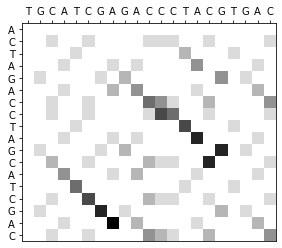

In [98]:
# test function
print("match = gap_penalty = mismatch_pentalty = 1:")
smith_waterman('ACTAGACCTAGCATCGAC', 'TGCATCGAGACCCTACGTGAC', 1, 1, 1)
plt.show()


match = 10, gap_penalty = 3, mismatch_pentalty = 7:
Longest matching length: 74.0
Matching sequences: 
 s1 = AGA-CCTA-G 
 s2 = AGACCCTACG


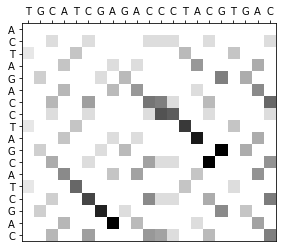

In [99]:
# test function
print("match = 10, gap_penalty = 3, mismatch_pentalty = 7:")
smith_waterman('ACTAGACCTAGCATCGAC', 'TGCATCGAGACCCTACGTGAC', 10, 3, 7)
plt.show()

match = 1, gap_penalty = 0, mismatch_pentalty = 1
Longest matching length: 8.0
Matching sequences: 
 s1 = AGA-CCTA-G 
 s2 = AGACCCTACG


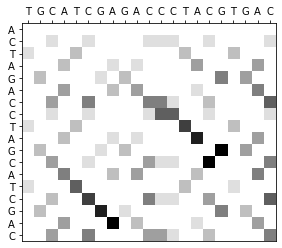

In [100]:
# test function
print("match = 1, gap_penalty = 0, mismatch_pentalty = 1")
smith_waterman('ACTAGACCTAGCATCGAC', 'TGCATCGAGACCCTACGTGAC', 1, 0, 1)
plt.show()